In [41]:
import cv2
import os
import numpy as np
from IPython.display import display, Image

In [42]:
video = cv2.VideoCapture('video.mp4')
fps = video.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)

frames per second = 29.875


In [43]:
count = 1
for i in range(0, 149, 4):
    success, image = video.read()
    cv2.imwrite(f"frames/frame{count}.jpg", image)
    count += 1
    if count > 30:
        break

In [44]:
input_folder = "frames"
target_width = 400
target_height = 600
images = []

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        original_image = cv2.imread(image_path)
        resized_image = cv2.resize(original_image, (target_width, target_height))
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        images.append(grayscale_image.flatten())       

In [45]:
H = np.array(images)
H = H.T
H.shape

(240000, 30)

In [46]:
column_means = np.mean(H, axis=0)
A = H - column_means

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

In [48]:
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]
print(f"Max eigenvalue of A.T @ A (and A @ A.T): {max_eigenvalue}")
print(f"Max eigenvector of A.T @ A: {max_eigenvector}")
max_eigenvector = A @ max_eigenvector
print(f"Max eigenvector of A @ A.T: {max_eigenvector}")

Max eigenvalue of A.T @ A (and A @ A.T): 16454992022.21233
Max eigenvector of A.T @ A: [-0.18759107 -0.17685414 -0.17388189 -0.17887854 -0.18884006 -0.17549681
 -0.17476088 -0.18067098 -0.18236191 -0.18579461 -0.19379685 -0.19474118
 -0.18408044 -0.18636348 -0.19294015 -0.19190793 -0.17785648 -0.19148715
 -0.19071281 -0.19115339 -0.1946794  -0.16620227 -0.1898614  -0.18942659
 -0.1559022  -0.19016136 -0.17398203 -0.1743321  -0.19039075 -0.14031081]
Max eigenvector of A @ A.T: [709.10741277 699.34588699 613.18120181 ... 565.9037615  651.72135588
 721.00661456]


In [49]:
min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue = eigenvalues[min_eigenvalue_index]
min_eigenvector = eigenvectors[:, min_eigenvalue_index]
print(f"Min eigenvalue of A.T @ A (and A @ A.T): {min_eigenvalue}")
print(f"Min eigenvector of A.T @ A: {min_eigenvector}")
min_eigenvector = A @ min_eigenvector
print(f"Min eigenvector of A @ A.T: {min_eigenvector}")

Min eigenvalue of A.T @ A (and A @ A.T): 26955.707606052987
Min eigenvector of A.T @ A: [-5.04413775e-03  3.05965532e-02 -5.71574674e-01 -1.55101768e-02
  1.16616471e-03 -6.77172753e-02  1.45272104e-01  6.53927008e-03
  6.73277343e-03  7.32796288e-03  5.71344772e-04  5.58673500e-04
 -1.17754047e-02 -2.49842658e-05 -1.61109083e-03  2.28259042e-05
  7.78113308e-05 -9.54272436e-05 -4.12061964e-04  1.97625953e-03
 -1.29116623e-04 -2.81095474e-04  4.74686788e-04 -4.63256067e-04
  2.82437771e-04  8.73033779e-04  7.53352727e-01 -2.80319228e-01
 -9.50405424e-04  3.56092576e-05]
Min eigenvector of A @ A.T: [0.01301353 0.101074   0.010931   ... 0.02999217 0.02654703 0.01760501]


In [50]:
def convert_array_to_image(vector):
    flattened_array = np.array(vector, dtype=np.uint8)
    desired_size = (600, 400) 
    reshaped_image = flattened_array.reshape(desired_size)
    display(Image(data=cv2.imencode('.png', reshaped_image)[1].tobytes()))

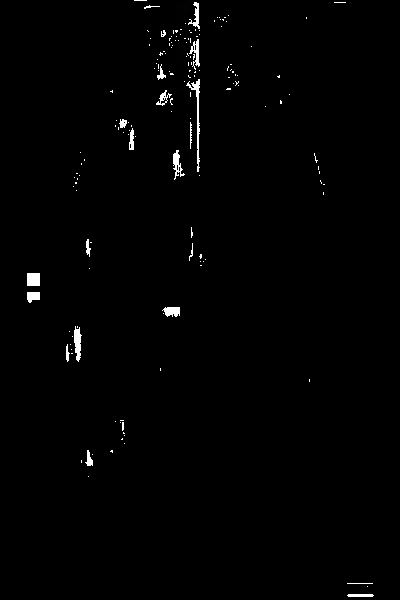

In [51]:
convert_array_to_image(min_eigenvector)

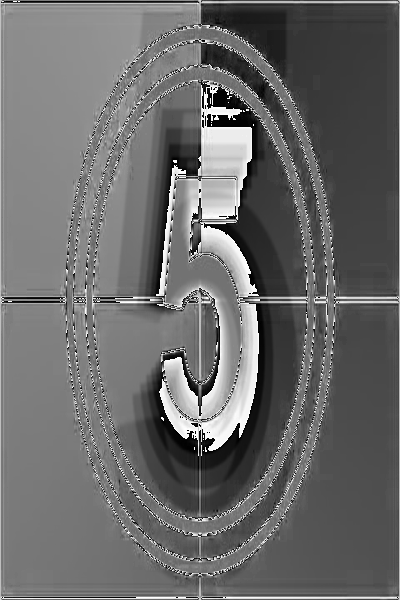

In [52]:
convert_array_to_image(max_eigenvector)